## Project Title: Analyzing Amazon Reviews for Product Insights
### The P < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

## Load the data

In [1]:
import pandas as pd

url = 'https://media.githubusercontent.com/media/hbedros/data620-final-project/main/electronics.csv'
df = pd.read_csv(url,index_col=0)

### The Question:
How do different product features and review characteristics affect customer satisfaction as shown by review ratings on Amazon?


### Data Sources:
We will use the Amazon Review Data (2018) provided by Jianmo Ni from UCSD. This dataset includes reviews (ratings, text, helpfulness votes), product details (descriptions, categories, price, brand, and image features), and links (also viewed/also bought graphs). It covers reviews from May 1996 to October 2018 and includes 233.1 million reviews. 

The dataset can be found [here](https://nijianmo.github.io/amazon/index.html).


**1. Data Preparation and Cleaning**
- **Assigned to:** Matt and Haig
- **Responsibilities:**
  - Load the dataset and parse the JSON files.
  - Clean the data by removing HTML/CSS content, duplicates, and irrelevant information.

The large dataset was cut down to a smaller size. The process is shown in the file Code_to_Filter_Electronigs_Dataset.ipynb

The data left in the final csv file named electronics.csv is from after 2016.



**2. Descriptive Analysis and Visualization**
- **Assigned to:** Julia
- **Responsibilities:**
  - Perform basic statistics on the dataset (e.g., average rating, number of reviews per product).
  - Create visualizations to show key metrics like rating distribution, number of reviews per category, and product pricing.


First, the counts of users, projects, reviews per user, and reviews per product are shown below.

In [2]:


unique_users = df['reviewerID'].nunique()
unique_products = df['asin'].nunique()
reviews_per_user = df['reviewerID'].value_counts()
reviews_per_product = df['asin'].value_counts()

print(f'Unique users: {unique_users}')
print(f'Unique products: {unique_products}')
print(f'Reviews per user:\n{reviews_per_user}')
print(f'Reviews per product:\n{reviews_per_product}')


Unique users: 384641
Unique products: 97768
Reviews per user:
reviewerID
A2XP8CV9ES33AM    166
A10SE0U42ABS9S    132
A24SPLNZFDBKD3     89
A3VFRG9YVQCUWO     81
A2DIQTZPF26T1L     80
                 ... 
A3PFLKF0HGH0VU      1
A2DKV3MEZ51PDD      1
A2X267JLQK7I4X      1
A1U64WC1WQ679Z      1
A2HE7TX3FE1RLE      1
Name: count, Length: 384641, dtype: int64
Reviews per product:
asin
B010OYASRG    2863
B000WYVBR0    2337
B0143IIP4W    2121
B000VS4HDM    2102
B00JX1ZS5O    1965
              ... 
B00KKWRQTQ       1
B0056Z3W6I       1
B00KKPQ2PC       1
B0056ZMP0C       1
B01HJF704M       1
Name: count, Length: 97768, dtype: int64


It will be interesting to see the number of reviews over time.

In [3]:
from datetime import datetime

df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

review_counts_over_time = df['datetime'].dt.date.value_counts().sort_index()

print(review_counts_over_time)


datetime
2017-01-01    2998
2017-01-02    4380
2017-01-03    4993
2017-01-04    4714
2017-01-05    4643
              ... 
2018-09-30      25
2018-10-01      17
2018-10-02       6
2018-10-03       2
2018-10-04       2
Name: count, Length: 642, dtype: int64


The time distribution is visualized below.

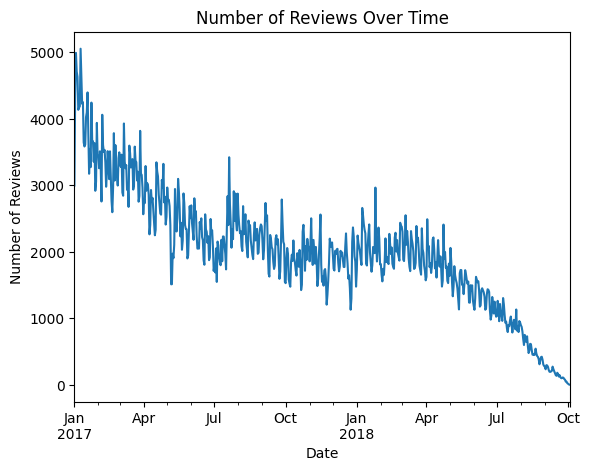

In [4]:
import matplotlib.pyplot as plt

# Plot review count over time
df.set_index('datetime').resample('D')['reviewText'].count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


The histogram below shows the lengths of reviews up to a length of 1000. Showing all lengths was not useful, so the maximum length was set to 1000 characters.

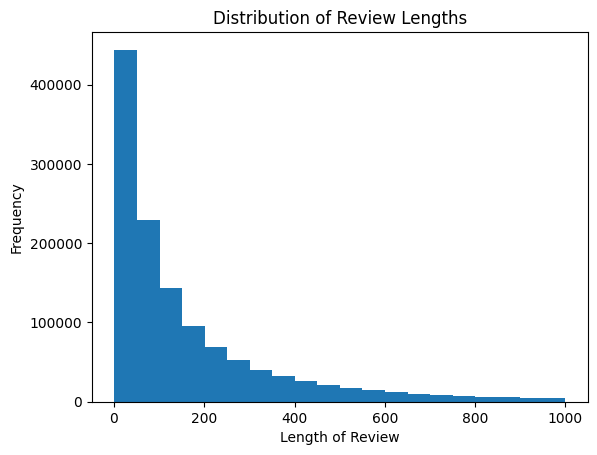

In [5]:
# Plot histogram of review lengths
df['reviewText'] = df['reviewText'].astype(str)

df['review_length'] = df['reviewText'].apply(len)

filtered_df = df[(df['review_length'] >= 0) & (df['review_length'] <= 1000)]

filtered_df['review_length'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


Reviews per user - top 25.

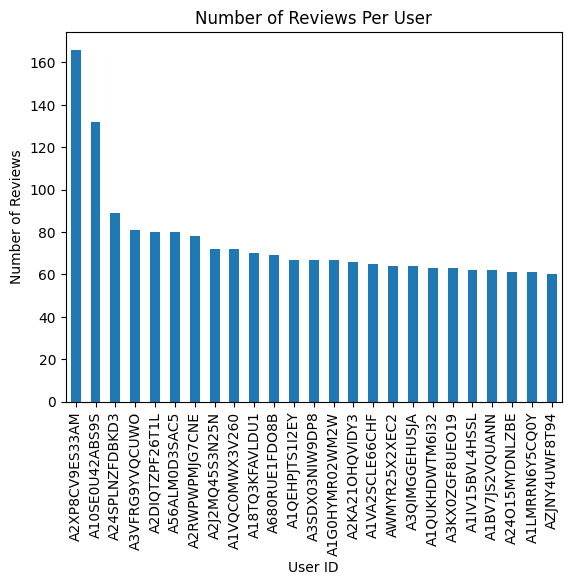

In [6]:
# Plot number of reviews per user
#df['reviewerID'].value_counts().plot(kind='bar')

reviews_per_user.head(25).plot(kind="bar")
plt.title('Number of Reviews Per User')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()


Reviews per product - top 25

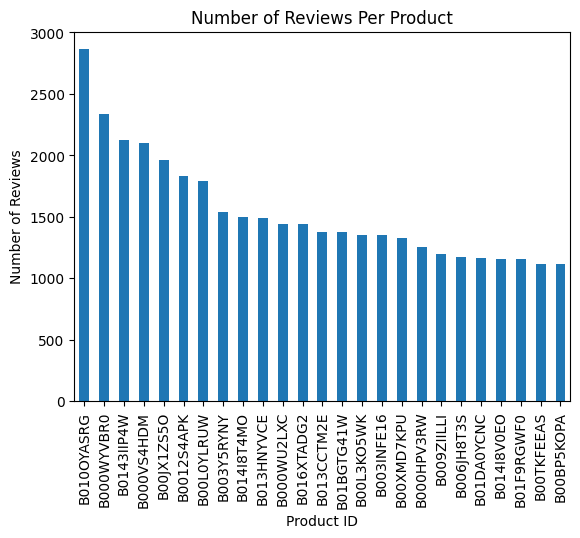

In [7]:
reviews_per_product.head(25).plot(kind='bar')
plt.title('Number of Reviews Per Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()


Distribution of top 5 summaries.

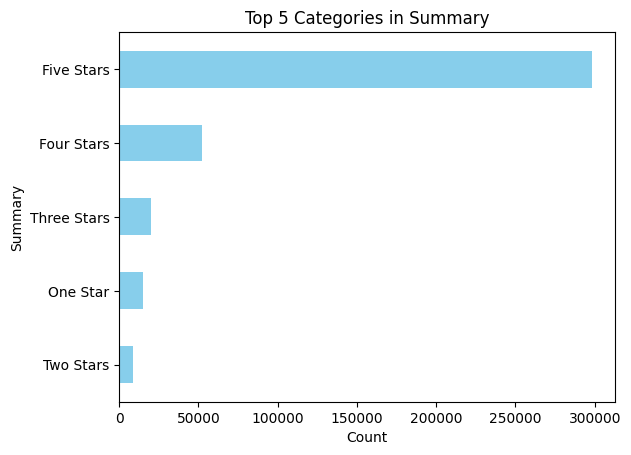

In [8]:
top_categories = df['summary'].value_counts().head(5)
top_categories.plot(kind='barh', color='skyblue')

plt.title('Top 5 Categories in Summary')
plt.xlabel('Count')
plt.ylabel('Summary')
plt.gca().invert_yaxis()  # Invert y-axis to show highest count at the top
plt.show()


Word Cloud

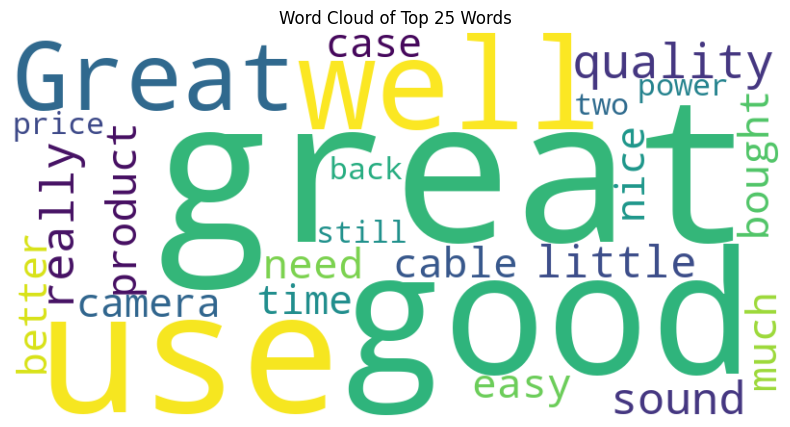

In [9]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text into one string
all_text = ' '.join(df['reviewText'])

stopwords = set(STOPWORDS)
stopwords.update(['will', 'one', 'work', 'it.', 'even', 'used', 'using', 'Great', 'works', '-'])

# Calculate word frequencies
word_counts = {}
for word in all_text.split():
    if word.lower() not in stopwords:
        word_counts[word] = word_counts.get(word, 0) + 1

# Select top 5 words based on frequency
top_words = sorted(word_counts, key=word_counts.get, reverse=True)[:25]

# Generate word cloud from top 5 words
wordcloud_data = {word: word_counts[word] for word in top_words}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 25 Words')
plt.show()


**3. Network Analysis**
- **Assigned to:** Selina
- **Responsibilities:**
  - Create and analyze the "also viewed" and "also bought" graphs to find popular product groups.
  - Use centrality measures to find important products in these networks.


**4. NLP and Text Mining**
- **Assigned to:** Matt
- **Responsibilities:**
  - Perform sentiment analysis on review texts to measure customer satisfaction.
  - Do topic modeling to find common themes in positive and negative reviews.


**5. Predictive Analysis**
- **Assigned to:** Julia and Haig
- **Responsibilities:**
  - Train machine learning models to predict review ratings based on review text and product features.
  - Evaluate model performance and improve it as needed.


References:

1. Justifying recommendations using distantly-labeled reviews and fine-grained aspects  
Jianmo Ni, Jiacheng Li, Julian McAuley  
Empirical Methods in Natural Language Processing (EMNLP), 2019
